## Import das bibliotecas

In [2]:
import pandas as pd
import numpy as np
from config import *
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)

## Leitura dos dados

In [3]:
df = pd.read_csv(path_arquivo_treino)
df.shape

(228216, 26)

In [4]:
df.head()

,id_policy,year,pol_no_claims_discount,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,drv_sex1,drv_age1,drv_age_lic1,drv_drv2,drv_sex2,drv_age2,drv_age_lic2,vh_make_model,vh_age,vh_fuel,vh_type,vh_speed,vh_value,vh_weight,population,town_surface_area,claim_amount
0,PL000000,1.0,0.332,Med2,5,1,Monthly,No,WorkPrivate,M,35.0,16.0,Yes,F,26.0,1.0,aparvvfowrjncdhp,8.0,Gasoline,Tourism,174.0,11040.0,1143.0,1270.0,33.1,0.0
1,PL042495,1.0,0.000,Med2,6,1,Monthly,No,WorkPrivate,M,60.0,41.0,No,0,NaN,NaN,aparvvfowrjncdhp,10.0,Diesel,Tourism,174.0,11040.0,1143.0,1290.0,51.3,0.0
2,PL042496,1.0,0.196,Med1,2,1,Yearly,Yes,Retired,M,55.0,35.0,Yes,F,57.0,38.0,iwhqpdfuhrsxyqxe,8.0,Diesel,Commercial,150.0,14159.0,1193.0,1020.0,262.8,0.0
3,PL042497,1.0,0.000,Med2,8,5,Yearly,No,WorkPrivate,F,54.0,31.0,No,0,NaN,NaN,kvcddisqpkysmvvo,4.0,Gasoline,Tourism,149.0,17233.0,1012.0,180.0,219.7,0.0
4,PL042498,1.0,0.000,Med1,2,2,Yearly,No,Retired,F,65.0,38.0,No,0,NaN,NaN,tdgkjlphosocwbgu,13.0,Gasoline,Tourism,200.0,19422.0,1315.0,30.0,70.3,0.0


## Análise das colunas

#### Id_policy

In [5]:
df['id_policy'].str.len().value_counts()

8    228216
Name: id_policy, dtype: int64

In [6]:
df['id_policy'].str[:2].value_counts()

PL    228216
Name: id_policy, dtype: int64

In [7]:
df['id_policy'].value_counts().value_counts()

4    57054
Name: id_policy, dtype: int64

#### Year

In [8]:
df['year'].value_counts()

4.0    57054
3.0    57054
2.0    57054
1.0    57054
Name: year, dtype: int64

#### pol_no_claims_discount

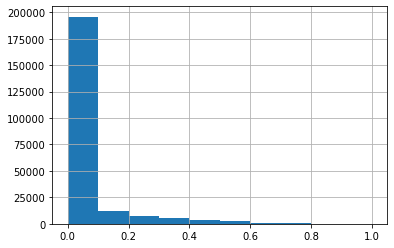

In [9]:
df['pol_no_claims_discount'].hist()

In [10]:
len(df[df['pol_no_claims_discount']>0.8]['id_policy'])

147

In [11]:
df[df['pol_no_claims_discount']>0.8]['id_policy'].nunique() #numero de policy >0.8

98

Alguns clientes tiveram taxa maior que 0.8 por apenas um ano

(ideia: fazer grafico dessa taxa nos anos, para ver se tem algum ano com atividade suspeita)

#### Pol_coverage

In [12]:
df['pol_coverage'].value_counts()

Max     146516
Med2     40072
Med1     21792
Min      19836
Name: pol_coverage, dtype: int64

In [13]:
df.groupby(['year','pol_coverage'])['id_policy'].count()

year  pol_coverage
1.0   Max             36629
      Med1             5448
      Med2            10018
      Min              4959
2.0   Max             36629
      Med1             5448
      Med2            10018
      Min              4959
3.0   Max             36629
      Med1             5448
      Med2            10018
      Min              4959
4.0   Max             36629
      Med1             5448
      Med2            10018
      Min              4959
Name: id_policy, dtype: int64

#### Pol_duration

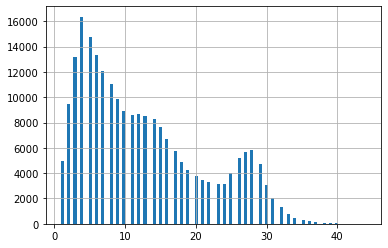

In [14]:
df['pol_duration'].hist(bins=100)

(grafico com cor sendo ano)

#### Pol_sit_duration

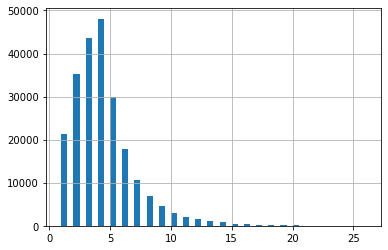

In [15]:
df['pol_sit_duration'].hist(bins=50)

#### pol_pay_freq

In [16]:
df['pol_pay_freq'].value_counts()

Yearly       84850
Monthly      70162
Biannual     66945
Quarterly     6259
Name: pol_pay_freq, dtype: int64

#### pol_payd

In [17]:
df['pol_payd'].value_counts()

No     218696
Yes      9520
Name: pol_payd, dtype: int64

(ideia:ver diferença de preços de quem esta no pacote e quem nao esta no pacote)

#### pol_usage

In [18]:
df['pol_usage'].value_counts()

WorkPrivate     149976
Retired          61988
Professional     16044
AllTrips           208
Name: pol_usage, dtype: int64

(ideia:ver cobertura de cada caso)

#### 	drv_sex1 e drv_sex2

In [19]:
df['drv_sex1'].value_counts()

M    137868
F     90348
Name: drv_sex1, dtype: int64

In [20]:
df['drv_sex2'].value_counts()

0    152896
F     45976
M     29344
Name: drv_sex2, dtype: int64

(ideia:analisar se existe relação entre o claim amount e o sexo)

#### drv_age1 e drv_age2


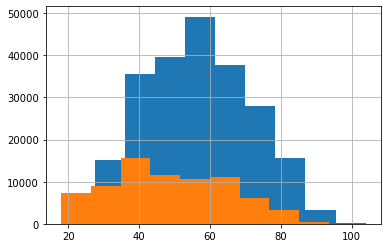

In [21]:
df['drv_age1'].hist()
df['drv_age2'].hist()

#### drv_drv2

In [25]:
df['drv_drv2'].value_counts()

No     152896
Yes     75320
Name: drv_drv2, dtype: int64

#### drv_age_lic1 e drv_age_lic2

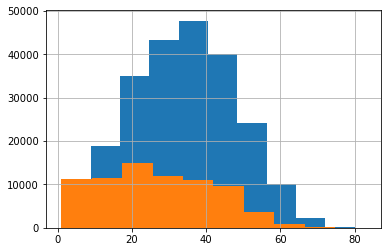

In [29]:
df['drv_age_lic1'].hist()
df['drv_age_lic2'].hist()

fazer scatterplot com esses dois dados

#### vh_make_model

In [33]:
df[df['year']==1]['vh_make_model'].value_counts()

rthsjeyjgdlmkygk    4181
johsjccpkithubii    2324
biqzvbfzjivqmrro    2134
swjkmyqytzxjwgag    1869
tdgkjlphosocwbgu    1553
                    ... 
khwbllfppvhgkgzc       1
uczhoudymbvnhter       1
eyaqhofitsegmcwi       1
ogdxwqtrpclsxeyw       1
zuqrdemwihnexkpw       1
Name: vh_make_model, Length: 975, dtype: int64

#### vh age

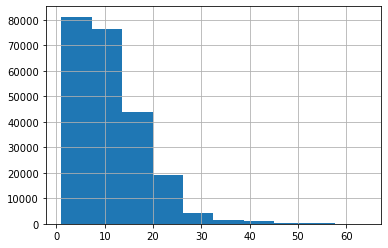

In [34]:
df['vh_age'].hist()

#### vh_fuel

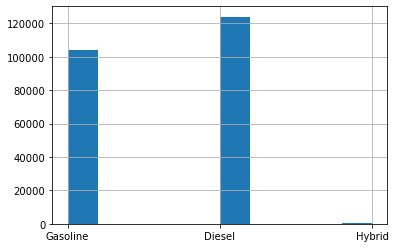

In [35]:
df['vh_fuel'].hist()

#### vh_type

In [37]:
df['vh_type'].value_counts()

Tourism       205496
Commercial     22720
Name: vh_type, dtype: int64

#### vh_speed

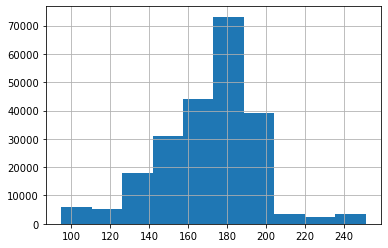

In [38]:
df['vh_speed'].hist()

In [57]:
df[df['vh_speed']<180]['claim_amount'].value_counts()[0.00]/len(df[df['vh_speed']<180])

0.9060172002185981

In [58]:
df[df['vh_speed']>180]['claim_amount'].value_counts()[0.00]/len(df[df['vh_speed']>180])

0.8833049616982926

#### vh_value

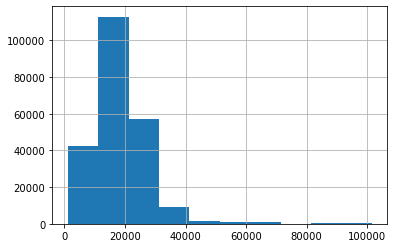

In [59]:
df['vh_value'].hist()

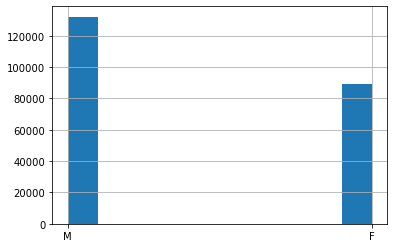

In [70]:
df[df['vh_value']<40000]['drv_sex1'].hist()

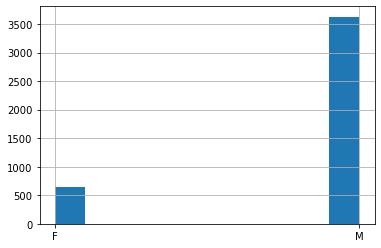

In [69]:
df[df['vh_value']>40000]['drv_sex1'].hist()

#### vh_weight 

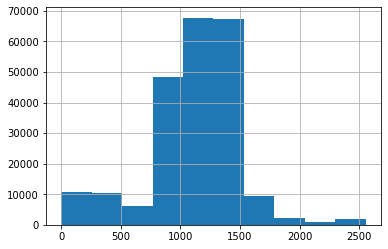

In [78]:
df['vh_weight'].hist()

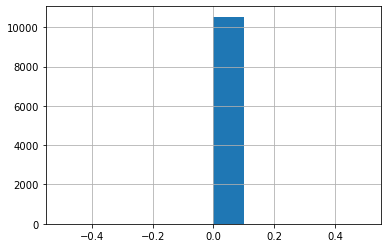

In [16]:
df[df['vh_weight']<10]['vh_weight'].hist()

#### population 

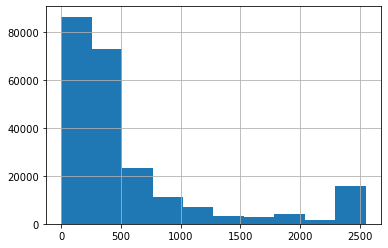

In [86]:
df['population'].hist()

In [84]:
df[df['population']==0]

,id_policy,year,pol_no_claims_discount,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,drv_sex1,drv_age1,drv_age_lic1,drv_drv2,drv_sex2,drv_age2,drv_age_lic2,vh_make_model,vh_age,vh_fuel,vh_type,vh_speed,vh_value,vh_weight,population,town_surface_area,claim_amount
1081,PL041037,1.0,0.000,Max,27,6,Biannual,No,Retired,F,65.0,19.0,No,0,NaN,NaN,sioekxjbocpzrjzi,22.0,Gasoline,Tourism,174.0,8728.0,0.0,0.0,30.3,0.00
4920,PL040687,1.0,0.000,Max,31,11,Yearly,No,WorkPrivate,F,63.0,13.0,No,0,NaN,NaN,zoypfizhpbtpjwpv,11.0,Gasoline,Tourism,145.0,10896.0,660.0,0.0,66.3,0.00
5353,PL038458,1.0,0.000,Max,11,3,Biannual,No,WorkPrivate,M,57.0,35.0,Yes,M,59.0,34.0,swjkmyqytzxjwgag,4.0,Gasoline,Tourism,175.0,23900.0,1285.0,0.0,57.0,0.00
6059,PL052524,1.0,0.000,Min,4,1,Yearly,No,WorkPrivate,M,64.0,46.0,No,0,NaN,NaN,dbtkrhmbfxpkqbau,7.0,Diesel,Tourism,150.0,30795.0,1690.0,0.0,133.9,0.00
14209,PL023953,1.0,0.000,Max,25,2,Biannual,No,Retired,M,79.0,56.0,No,0,NaN,NaN,rthsjeyjgdlmkygk,6.0,Diesel,Tourism,182.0,12820.0,1036.0,0.0,40.0,2038.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220542,PL052524,4.0,0.000,Min,7,4,Yearly,No,WorkPrivate,M,67.0,49.0,No,0,NaN,NaN,dbtkrhmbfxpkqbau,10.0,Diesel,Tourism,150.0,30795.0,1690.0,0.0,133.9,0.00
222821,PL006519,4.0,0.225,Med2,11,6,Monthly,No,Professional,M,47.0,11.0,No,0,NaN,NaN,dllcylnkzeegtsgr,11.0,Diesel,Commercial,NaN,NaN,NaN,0.0,101.8,0.00
222932,PL008242,4.0,0.000,Min,16,7,Biannual,No,WorkPrivate,M,61.0,42.0,No,0,NaN,NaN,tgvulwtrjyegawlr,17.0,Gasoline,Commercial,110.0,9657.0,0.0,0.0,57.0,0.00
224901,PL059087,4.0,0.000,Med2,26,12,Monthly,No,Retired,F,82.0,56.0,No,0,NaN,NaN,jhdjdpthkztnjvmb,20.0,Gasoline,Tourism,138.0,17126.0,1110.0,0.0,144.3,0.00


#### town_surface_area


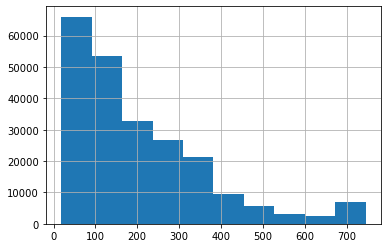

In [87]:
df['town_surface_area'].hist()

#### claim_amount 

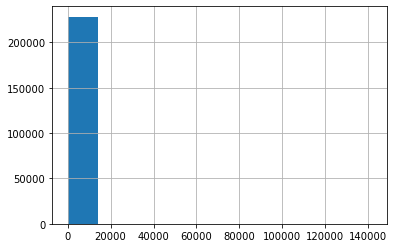

In [88]:
df['claim_amount'].hist()

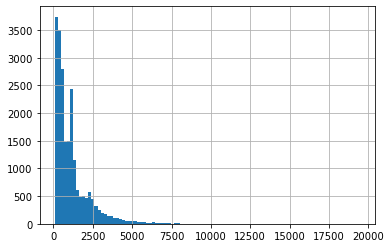

In [98]:
df[(df['claim_amount']>100) & (df['claim_amount']<20000)]['claim_amount'].hist(bins=100)

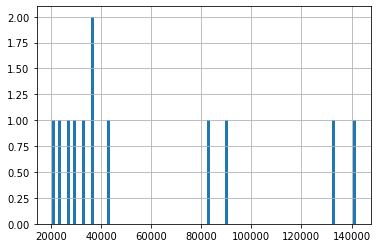

In [99]:
df[(df['claim_amount']>20000)]['claim_amount'].hist(bins=100)

In [100]:
df[df['claim_amount']>120000]

,id_policy,year,pol_no_claims_discount,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,drv_sex1,drv_age1,drv_age_lic1,drv_drv2,drv_sex2,drv_age2,drv_age_lic2,vh_make_model,vh_age,vh_fuel,vh_type,vh_speed,vh_value,vh_weight,population,town_surface_area,claim_amount
13790,PL025631,1.0,0.0,Med2,31,8,Monthly,No,Retired,F,73.0,50.0,Yes,M,39.0,21.0,biqzvbfzjivqmrro,11.0,Gasoline,Tourism,140.0,1113.0,393.0,530.0,61.7,141828.26
215044,PL032444,4.0,0.0,Max,25,7,Biannual,No,WorkPrivate,F,68.0,43.0,No,0,NaN,NaN,zspzyfdefowgwddf,9.0,Gasoline,Tourism,200.0,25000.0,1300.0,310.0,96.5,132736.61


#### Testes

In [217]:
df.corr()['claim_amount']

year                     -0.007095
pol_no_claims_discount    0.016296
pol_duration             -0.002996
pol_sit_duration         -0.025099
drv_age1                 -0.000572
drv_age_lic1              0.000089
drv_age2                 -0.003440
drv_age_lic2             -0.004777
vh_age                   -0.064097
vh_speed                  0.031857
vh_value                  0.032733
vh_weight                 0.029295
population                0.009372
town_surface_area        -0.006377
claim_amount              1.000000
Name: claim_amount, dtype: float64

In [110]:
df[df['claim_amount']>0].sample()

,id_policy,year,pol_no_claims_discount,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,drv_sex1,drv_age1,drv_age_lic1,drv_drv2,drv_sex2,drv_age2,drv_age_lic2,vh_make_model,vh_age,vh_fuel,vh_type,vh_speed,vh_value,vh_weight,population,town_surface_area,claim_amount
25525,PL084523,1.0,0.483,Max,4,3,Yearly,No,WorkPrivate,F,64.0,45.0,No,0,NaN,NaN,demgvtbzilochupd,7.0,Gasoline,Tourism,160.0,2088.0,0.0,380.0,332.5,530.73


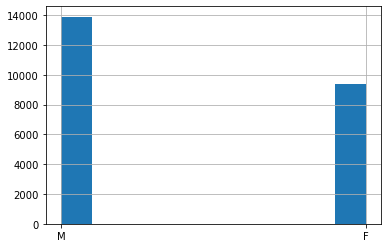

In [112]:
df[df['claim_amount']>0]['drv_sex1'].hist()

In [122]:
df[df['id_policy']=='PL084523'].iloc[:,:]

,id_policy,year,pol_no_claims_discount,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,drv_sex1,drv_age1,drv_age_lic1,drv_drv2,drv_sex2,drv_age2,drv_age_lic2,vh_make_model,vh_age,vh_fuel,vh_type,vh_speed,vh_value,vh_weight,population,town_surface_area,claim_amount
25525,PL084523,1.0,0.483,Max,4,3,Yearly,No,WorkPrivate,F,64.0,45.0,No,0,NaN,NaN,demgvtbzilochupd,7.0,Gasoline,Tourism,160.0,2088.0,0.0,380.0,332.5,530.73
68562,PL084523,2.0,0.428,Max,5,4,Yearly,No,WorkPrivate,F,65.0,46.0,No,0,NaN,NaN,demgvtbzilochupd,8.0,Gasoline,Tourism,160.0,2088.0,0.0,380.0,332.5,0.00
168880,PL084523,3.0,0.381,Max,6,5,Yearly,No,WorkPrivate,F,66.0,47.0,No,0,NaN,NaN,demgvtbzilochupd,9.0,Gasoline,Tourism,160.0,2088.0,0.0,380.0,332.5,2112.93
173905,PL084523,4.0,0.584,Max,7,6,Yearly,No,WorkPrivate,F,67.0,48.0,No,0,NaN,NaN,demgvtbzilochupd,10.0,Gasoline,Tourism,160.0,2088.0,0.0,380.0,332.5,106.75


In [114]:
df[df['claim_amount']>0].groupby('id_policy')['claim_amount'].count().value_counts()

1    14440
2     3495
3      542
4       59
Name: claim_amount, dtype: int64

In [120]:
pd.get_dummies(df['pol_coverage'])

,Max,Med1,Med2,Min
0,0,0,1,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,1,0,0
...,...,...,...,...
228211,0,0,1,0
228212,1,0,0,0
228213,1,0,0,0
228214,1,0,0,0


In [139]:
df_com_claim = df[df['claim_amount']>0]
df_sem_claim = df[df['claim_amount']==0]

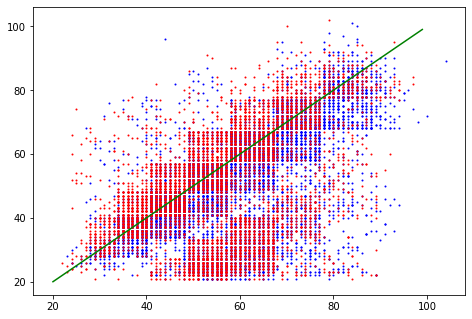

In [183]:
df_scatter = df[df['year']==4].dropna(subset = ['drv_age2'])

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df_scatter[df_scatter['drv_sex1']=='M']['drv_age1'], df_scatter[df_scatter['drv_sex1']=='M']['drv_age2'], color='b',s=1)
ax.scatter(df_scatter[df_scatter['drv_sex1']=='F']['drv_age1'], df_scatter[df_scatter['drv_sex1']=='F']['drv_age2'], color='r',s=1)
ax.plot(list(range(20,100)),list(range(20,100)),color='g')

0.12165323628801664


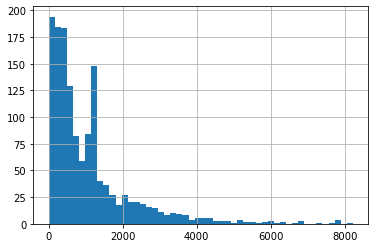

In [213]:
df_drv2_jovem = df[df['drv_age2']<=30]

print(len(df_drv2_jovem[df_drv2_jovem['claim_amount']>0])/len(df_drv2_jovem))

df_drv2_jovem[df_drv2_jovem['claim_amount']>0]['claim_amount'].hist(bins=50)

0.10101765316718588


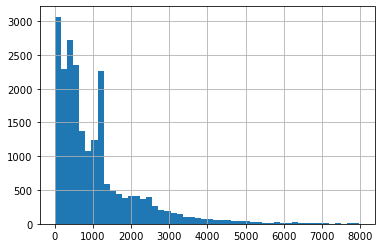

In [214]:
df_drv2_jovem = df[(df['drv_age2']<=30)==False]
print(len(df_drv2_jovem[df_drv2_jovem['claim_amount']>0])/len(df_drv2_jovem))

df_drv2_jovem[(df_drv2_jovem['claim_amount']>0) & (df_drv2_jovem['claim_amount']<8000)]['claim_amount'].hist(bins=50)

In [197]:
len(df[df['claim_amount']>0])/len(df)

0.10206120517404564